# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
# Setting citycount for city number to be displayed in for loop
citycount = 0

# Generating the variables needed for the dataframe columns as empty lists
found_cities, lat, lng, max_temp, humidity, cloudiness, wind_speed, country, date = [],[],[],[],[],[],[],[],[]

# Running for loop calling the API for each city's current weather data
for x in cities:
    citycount += 1
    print(f"Processing Record {citycount} of {len(cities)} | {x}")
    cityresp = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={x}&appid={weather_api_key}&units=imperial").json()
    
    time.sleep(1)
    
    try:
        lat.append(cityresp["coord"]["lat"])
        lng.append(cityresp["coord"]["lon"])
        max_temp.append(cityresp["main"]["temp_max"])
        humidity.append(cityresp["main"]["humidity"])
        cloudiness.append(cityresp["clouds"]["all"])
        wind_speed.append(cityresp["wind"]["speed"])
        country.append(cityresp["sys"]["country"])
        date.append(cityresp["dt"])
        found_cities.append(x)
        
    except:
        print(f"City of {x} not found. Skipping...")
        pass

Processing Record 1 of 594 | yulara
Processing Record 2 of 594 | katubao
Processing Record 3 of 594 | mana
Processing Record 4 of 594 | nantucket
Processing Record 5 of 594 | sitka
Processing Record 6 of 594 | illoqqortoormiut
City of illoqqortoormiut not found. Skipping...
Processing Record 7 of 594 | punta arenas
Processing Record 8 of 594 | pevek
Processing Record 9 of 594 | rikitea
Processing Record 10 of 594 | ilulissat
Processing Record 11 of 594 | filadelfia
Processing Record 12 of 594 | faya
Processing Record 13 of 594 | marystown
Processing Record 14 of 594 | kalabo
Processing Record 15 of 594 | butaritari
Processing Record 16 of 594 | fairbanks
Processing Record 17 of 594 | dikson
Processing Record 18 of 594 | puerto ayora
Processing Record 19 of 594 | bredasdorp
Processing Record 20 of 594 | thinadhoo
Processing Record 21 of 594 | biltine
Processing Record 22 of 594 | barrow
Processing Record 23 of 594 | lebu
Processing Record 24 of 594 | mwinilunga
Processing Record 25 of 5

Processing Record 197 of 594 | la ronge
Processing Record 198 of 594 | wamba
Processing Record 199 of 594 | cashel
Processing Record 200 of 594 | umzimvubu
City of umzimvubu not found. Skipping...
Processing Record 201 of 594 | teshie
Processing Record 202 of 594 | ukiah
Processing Record 203 of 594 | maniitsoq
Processing Record 204 of 594 | vaitupu
City of vaitupu not found. Skipping...
Processing Record 205 of 594 | baruun-urt
Processing Record 206 of 594 | tasiilaq
Processing Record 207 of 594 | grand river south east
City of grand river south east not found. Skipping...
Processing Record 208 of 594 | vardo
Processing Record 209 of 594 | ahipara
Processing Record 210 of 594 | ciampino
Processing Record 211 of 594 | pervomayskoye
Processing Record 212 of 594 | sao felix do xingu
Processing Record 213 of 594 | shitkino
Processing Record 214 of 594 | matara
Processing Record 215 of 594 | feodosiya
Processing Record 216 of 594 | eyrarbakki
Processing Record 217 of 594 | hami
Processing 

Processing Record 382 of 594 | lagoa
Processing Record 383 of 594 | abaza
Processing Record 384 of 594 | poya
Processing Record 385 of 594 | aripuana
Processing Record 386 of 594 | vrangel
Processing Record 387 of 594 | kokoda
Processing Record 388 of 594 | ejido
Processing Record 389 of 594 | nachingwea
Processing Record 390 of 594 | oak ridge
Processing Record 391 of 594 | xichang
Processing Record 392 of 594 | port hardy
Processing Record 393 of 594 | presidencia roque saenz pena
Processing Record 394 of 594 | bolama
Processing Record 395 of 594 | kokopo
Processing Record 396 of 594 | leon
Processing Record 397 of 594 | paradwip
City of paradwip not found. Skipping...
Processing Record 398 of 594 | araouane
Processing Record 399 of 594 | sheopur
Processing Record 400 of 594 | kralendijk
Processing Record 401 of 594 | pilar
Processing Record 402 of 594 | jishui
Processing Record 403 of 594 | mogok
Processing Record 404 of 594 | iskateley
Processing Record 405 of 594 | yakeshi
Process

Processing Record 568 of 594 | egvekinot
Processing Record 569 of 594 | goundam
Processing Record 570 of 594 | pasni
Processing Record 571 of 594 | tilichiki
Processing Record 572 of 594 | porto novo
Processing Record 573 of 594 | limin khersonisou
Processing Record 574 of 594 | balsas
Processing Record 575 of 594 | muli
Processing Record 576 of 594 | kawalu
Processing Record 577 of 594 | malwan
City of malwan not found. Skipping...
Processing Record 578 of 594 | musafirkhana
Processing Record 579 of 594 | terney
Processing Record 580 of 594 | lorengau
Processing Record 581 of 594 | andalan
Processing Record 582 of 594 | owando
Processing Record 583 of 594 | mandalgovi
Processing Record 584 of 594 | lima
Processing Record 585 of 594 | kabinda
Processing Record 586 of 594 | lolua
City of lolua not found. Skipping...
Processing Record 587 of 594 | temir
Processing Record 588 of 594 | qasigiannguit
Processing Record 589 of 594 | pitimbu
Processing Record 590 of 594 | barsovo
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
# Turning all API calls into a dictionary and then into a dataframe
city_dict = {"City":found_cities,"Lat":lat,"Lng":lng,"Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,"Wind Speed":wind_speed,"Country":country,"Date":date}
city_data = pd.DataFrame(city_dict)

# Exporting the data into a csv to save for future use

city_data.to_csv("CityWeather.csv", index=False)

In [38]:
# Reading CSV that just exported in order to skip running the first cells again when coming back to work on assignment
weather_data = pd.read_csv("CityWeather.csv")
weather_data.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yulara,-25.2406,130.9889,68.00,20,20,17.27,AU,1611013223
1,katubao,5.8892,124.8294,78.13,71,99,2.17,PH,1611013224
2,mana,5.6592,-53.7767,78.01,83,100,12.46,GF,1611013225
3,nantucket,41.2835,-70.0995,42.80,75,1,14.97,US,1611013227
4,sitka,57.0531,-135.3300,44.60,81,90,23.02,US,1611013228
5,punta arenas,-53.1500,-70.9167,55.40,62,0,18.41,CL,1611013230
6,pevek,69.7008,170.3133,-29.07,86,93,6.82,RU,1611013231
7,rikitea,-23.1203,-134.9692,78.78,73,43,13.02,PF,1611013232
8,ilulissat,69.2167,-51.1000,12.20,61,97,3.44,GL,1611013233
9,filadelfia,39.9523,-75.1638,42.80,60,40,9.22,US,1611013205


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [40]:
weather_data.describe()
# There are no cities with humidity over 100

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,19.287353,19.513112,49.618516,73.342491,52.153846,8.124835,1.611014e+09
std,33.115526,91.277138,33.167448,19.233331,40.415118,6.022101,2.024329e+02
min,-54.800000,-179.166700,-55.910000,9.000000,0.000000,0.250000,1.611013e+09
25%,-8.724750,-58.611900,32.000000,64.000000,2.250000,3.600000,1.611013e+09
50%,22.184400,21.649100,61.340000,78.000000,60.500000,6.710000,1.611014e+09
75%,47.158275,102.101100,76.642500,86.000000,90.000000,11.500000,1.611014e+09
max,78.218600,179.316700,98.600000,100.000000,100.000000,33.150000,1.611014e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

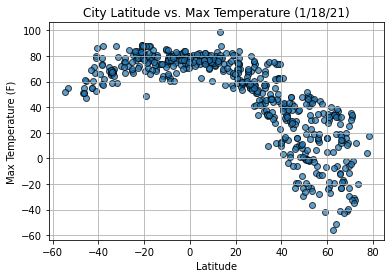

In [41]:
# Converting columns to lists for plotting datapoints
city_lat = weather_data["Lat"].to_list()
city_max_temp = weather_data["Max Temp"].to_list()

# Plotting
plt.scatter(city_lat,city_max_temp,facecolors="tab:blue",edgecolors="black",alpha=0.7)
plt.grid()
plt.title("City Latitude vs. Max Temperature (1/18/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Saving figure
plt.savefig("figures/latvstemp.png")

## Latitude vs. Humidity Plot

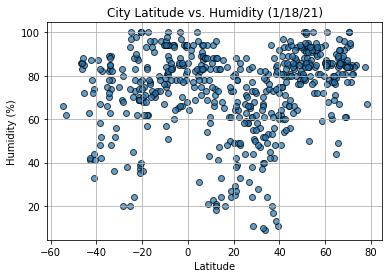

In [42]:
# Converting columns to lists for plotting datapoints (already have latitude)
city_humidity = weather_data["Humidity"].to_list()

# Plotting
plt.scatter(city_lat,city_humidity,facecolors="tab:blue",edgecolors="black",alpha=0.7)
plt.grid()
plt.title("City Latitude vs. Humidity (1/18/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Saving figure
plt.savefig("figures/latvshumid.png")

## Latitude vs. Cloudiness Plot

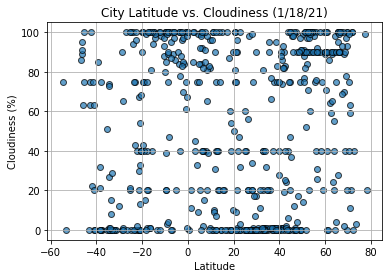

In [43]:
# Converting columns to lists for plotting datapoints (already have latitude)
city_cloudiness = weather_data["Cloudiness"].to_list()

# Plotting
plt.scatter(city_lat,city_cloudiness,facecolors="tab:blue",edgecolors="black",alpha=0.7)
plt.grid()
plt.title("City Latitude vs. Cloudiness (1/18/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Saving figure
plt.savefig("figures/latvscloud.png")

## Latitude vs. Wind Speed Plot

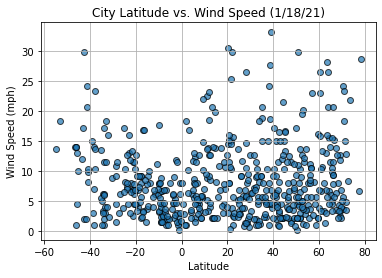

In [44]:
# Converting columns to lists for plotting datapoints (already have latitude)
city_wind_speed = weather_data["Wind Speed"].to_list()

# Plotting
plt.scatter(city_lat,city_wind_speed,facecolors="tab:blue",edgecolors="black",alpha=0.7)
plt.grid()
plt.title("City Latitude vs. Wind Speed (1/18/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Saving figure
plt.savefig("figures/latvswind.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


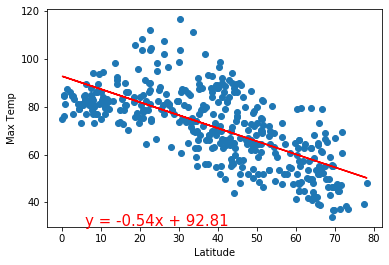

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


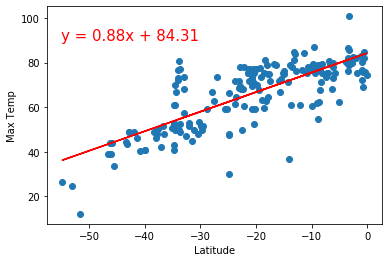

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


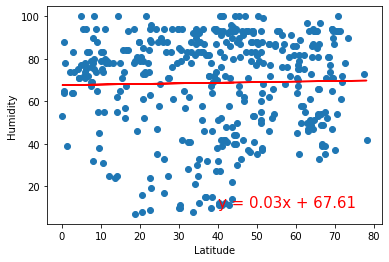

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


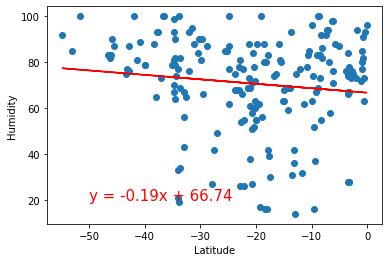

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


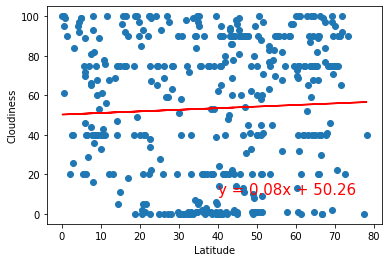

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


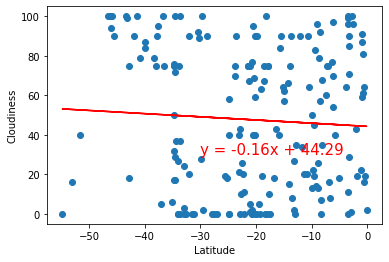

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


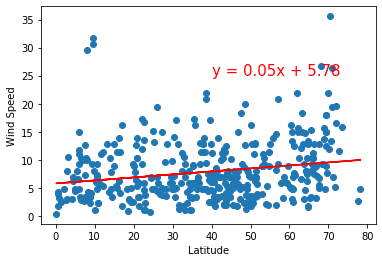

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


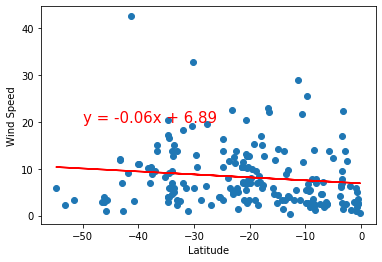